# resume checker


In [113]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import sklearn

In [114]:
df=pd.read_csv(r'C:/Users/Yukta Sharma/Downloads/archive.zip')

In [115]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [116]:
df.shape

(962, 2)

In [117]:
df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

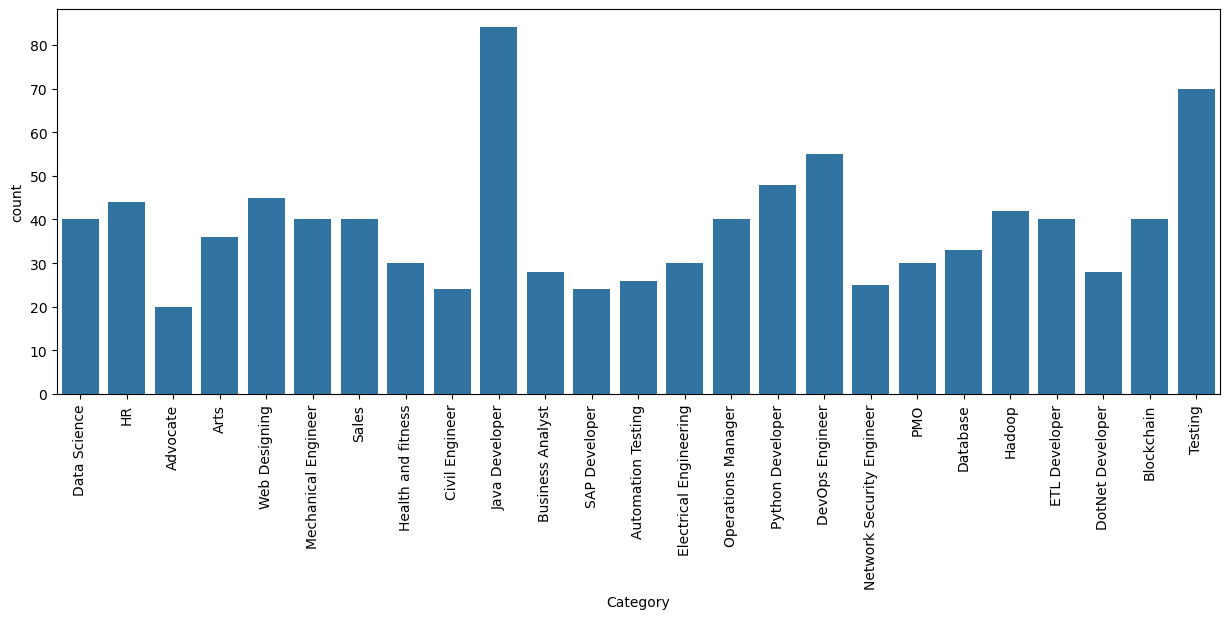

In [118]:
plt.figure(figsize=(15,5))
sns.countplot(x=df['Category'])
plt.xticks(rotation=90)
plt.show()

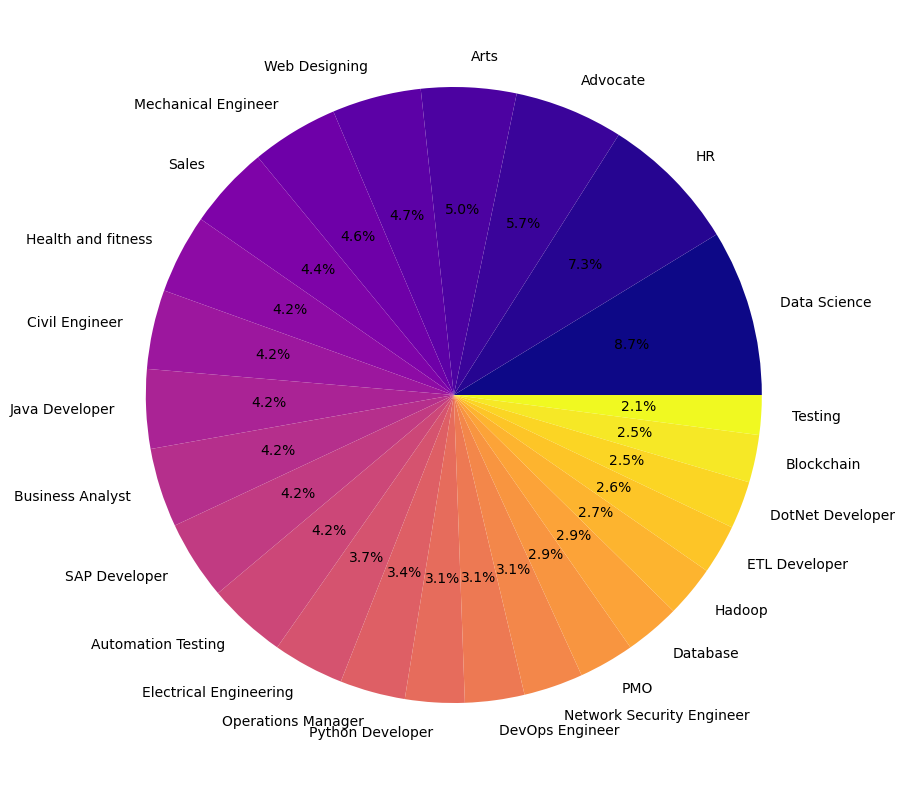

In [119]:
counts=df['Category'].value_counts()
labels=df['Category'].unique()
plt.figure(figsize=(15,10))
plt.pie(counts,labels=labels,autopct='%1.1f%%',colors=plt.cm.plasma(np.linspace(0,1,25)))
plt.show()

# exploring resume


In [120]:
df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [121]:
df['Category'][0]

'Data Science'

In [122]:
df['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

# cleaning data (url,hashtag,mentions,special letters,punctuations)

In [123]:
import re #real expression library
def cleanResume(txt):
    cleanTxt= re.sub('http\S+\s',' ',txt) #re.sub() replaces the matching string S+ is for following test and s is for white spaces
    cleanTxt= re.sub('RT|cc',' ',cleanTxt)
    cleanTxt= re.sub('@\S+',' ',cleanTxt)
    cleanTxt= re.sub('#\S+',' ',cleanTxt)
    cleanTxt= re.sub('[%s]' % re.escape("""!"#$&%'()*+,-./:;<=>'?@[\]^_{|}"""),' ',cleanTxt) #%s is used to remove the pattern and % includes the pattern and re.escape() used to escape all non-alphanumeric characters in a string. will be escaped with a backslash (\), making it a literal character in the context of a regular expression.
    cleanTxt = re.sub(r"(?<=\w)'(?=\w)", '', cleanTxt)
    cleanTxt= re.sub(r'[^\x100-\x7f]',' ',cleanTxt) #^ is for negation here
    cleanTxt= re.sub('\s+',' ',cleanTxt) #removing all sequences like \r or \n or \t
    return cleanTxt

<>:3: SyntaxWarning: invalid escape sequence '\S'
<>:5: SyntaxWarning: invalid escape sequence '\S'
<>:6: SyntaxWarning: invalid escape sequence '\S'
<>:7: SyntaxWarning: invalid escape sequence '\]'
<>:10: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\S'
<>:5: SyntaxWarning: invalid escape sequence '\S'
<>:6: SyntaxWarning: invalid escape sequence '\S'
<>:7: SyntaxWarning: invalid escape sequence '\]'
<>:10: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Yukta Sharma\AppData\Local\Temp\ipykernel_24888\2129368042.py:3: SyntaxWarning: invalid escape sequence '\S'
  cleanTxt= re.sub('http\S+\s',' ',txt) #re.sub() replaces the matching string S+ is for following test and s is for white spaces
C:\Users\Yukta Sharma\AppData\Local\Temp\ipykernel_24888\2129368042.py:5: SyntaxWarning: invalid escape sequence '\S'
  cleanTxt= re.sub('@\S+',' ',cleanTxt)
C:\Users\Yukta Sharma\AppData\Local\Temp\ipykernel_24888\2129368042.py:6: SyntaxWarning: inv

In [124]:
#dummy sentence
cleanResume("my ### $ & #resumecleaner website link is this http://hell0world and access it @gmail.com")

'my website link is this and a ess it '

In [125]:
df['Resume']=df['Resume'].apply(lambda x: cleanResume(x)) #the use of lambda serves as a way to apply the cleanResume function to each individual entry in the 'resume' column of the pandas DataFrame df.

In [126]:
df['Resume'][0]

'Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in a elerating the 

# words into categorical values 

In [127]:
from sklearn.preprocessing import LabelEncoder #LabelEncoder is a utility from the sklearn library that is used to convert categorical labels (i.e., non-numeric data) into numeric labels (integers).
le = LabelEncoder() # Instantiating the Encoder this will be used to fit and transform the data

In [128]:
le.fit(df['Category']) #It assigns each unique category a corresponding integer label.
df['Category'] = le.transform(df['Category']) # converts each category in the column into its corresponding integer label.
#resulting integer labels are then stored back into the df['Category'] column, replacing the original categorical data.
#Outcome: After this step, the df['Category'] column will contain integers instead of the original categorical strings.

In [129]:
df.Category.unique() # corresponding values represent the no. of cateogries in cateogorical values

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

# vectorization

In [130]:
#TF-IDF (Term Frequency-Inverse Document Frequency): weights words based on their importance across documents.

In [131]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(stop_words='english') #stop_words='english'. This means that common English stop words (like "the", "and", "is", etc.) will be removed during the vectorization process.
tfidf.fit(df['Resume']) # This step learns the vocabulary of the text data, calculates the IDF (Inverse Document Frequency) for each word, and prepares the vectorizer for transformation. Note that fit only computes these statistics; it doesn't transform the text yet.
requiredText=tfidf.transform(df['Resume']) #converting the txt data into tf idf matrix  Each document (resume) in df['Resume'] is now represented as a vector where each element corresponds to a word in the learned vocabulary, and the value is the TF-IDF score of that word.
#requiredText: This variable now holds a sparse matrix where rows represent documents (resumes) and columns represent the TF-IDF scores of the words in those documents. Sparse matrices are used for efficiency since most of the matrix elements will be zero.

In [132]:
requiredText

<962x7351 sparse matrix of type '<class 'numpy.float64'>'
	with 164261 stored elements in Compressed Sparse Row format>

# splitting

In [133]:
from sklearn.model_selection import train_test_split
#The train_test_split function is used to split your dataset into two subsets: one for training the model and another for testing (evaluating) its performance.

In [134]:
X_train, X_test, y_train , y_test = train_test_split(requiredText,df['Category'],test_size=0.2,random_state=42)
'''requiredText(input) df[category] (target variable basically categories we want to predict) test_size(specifies the proportion of the dataset to include in the test split.20% of the data will be used for testing, and the remaining 80% for training.) this parameter ensures reproducibility. By setting a fixed random_state, you ensure that the data split is the same every time you run the code.
Value: 42 is a commonly used arbitrary number; any integer can be used'''

'requiredText(input) df[category] (target variable basically categories we want to predict) test_size(specifies the proportion of the dataset to include in the test split.20% of the data will be used for testing, and the remaining 80% for training.) this parameter ensures reproducibility. By setting a fixed random_state, you ensure that the data split is the same every time you run the code.\nValue: 42 is a commonly used arbitrary number; any integer can be used'

In [135]:
t1=X_train.shape
t2=X_test.shape
print(t1,t2)

(769, 7351) (193, 7351)


# 769+193=962 and 7351 is due to sparse matrix

# training the model and printing the classification

In [136]:
'''using kneighbour classifier KNN is appropriate here because it assigns class labels based on the similarity between data points, which fits the nature of classification problems.
onevsrestclassifier=This is a strategy for handling multi-class classification problems  breaks down a multi-class problem into multiple binary classification problems, which can simplify the learning process, particularly when using certain algorithms.
accuracy_score: A function that calculates the accuracy of the model, which is the proportion of correctly predicted labels over the total number of predictions.
accuracy_score(y_test, ypred): Compares the true labels (y_test) with the predicted labels (ypred) and returns the accuracy, which is the ratio of correctly predicted instances to the total number of instances.
'''

'using kneighbour classifier KNN is appropriate here because it assigns class labels based on the similarity between data points, which fits the nature of classification problems.\nonevsrestclassifier=This is a strategy for handling multi-class classification problems  breaks down a multi-class problem into multiple binary classification problems, which can simplify the learning process, particularly when using certain algorithms.\naccuracy_score: A function that calculates the accuracy of the model, which is the proportion of correctly predicted labels over the total number of predictions.\naccuracy_score(y_test, ypred): Compares the true labels (y_test) with the predicted labels (ypred) and returns the accuracy, which is the ratio of correctly predicted instances to the total number of instances.\n'

In [137]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score
clf= OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train,y_train)
ypred=clf.predict(X_test)
print(accuracy_score(y_test,ypred))

0.9844559585492227


# prediction system

In [138]:
import pickle
pickle.dump(tfidf,open('tfidf.pkl','wb'))
pickle.dump(clf,open('clf.pkl','wb'))

In [139]:
myresume=""" WORK EXPERIENCE
OctaNet Services Pvt Ltd.
•
Working on web and java development as an Intern.
HackHound, SRMIST.
• Core Member(Sep 2023-Present)
Connect with Director Team.
• Team Member(Sep 2022-Sep 2023)
PROJECTS
• Jottings Application.
An application to jot down all your daily tasks which are upcoming or have been completed and easy to use. Build using ReactJS.
• Password Generator.
An application to generate strong passwords.
Build using ReactJS.
• My Profile.
A website about my profile as a part of learning.
Build using HTML and CSS.
SKILLS
•
Programming Languages: Java, C,C++,Python.
•
Frontend Web Development: HTML, CSS, JavaScript.
• Backend Web Development: MongoDB, MySQL.
EDUCATION
SRM INSTITUTE OF SCIENCE AND TECHNOLOGY
(B.Tech) Computer Science CGPA:9.43 July 2022 - Present
CITY MONTESSORI SCHOOL,
LUCKNOW, UTTAR PRADESH
XII (Senior Secondary) Science Percentage: 95.5% March 2021
CITY MONTESSORI SCHOOL,
LUCKNOW, UTTAR PRADESH
X (Secondary) Science Percentage: 94.2% March 2019
POSITION OF RESPONSIBILITY
Organizing Team of HackHound , SRM IST
(24 hours National Level Hackathon).
AWARDS AND ACHIEVEMENTS
●
Certification by HackerRank on Java(Basic) and Python(Basic).
●
Certification by Coursera on getting started with Azure IOT Hub
●
Certification by Udemy on Accounting and Auditing with AI-Odoo 17
●
Certification on Ethical hacking by Remarkskill Education
●
Certificate of workshop in Ethical hacking , IIT Roorkee.
●
Yuva’s Knack-Startup Ideas, SRMIST

"""

In [140]:
import pickle
clf=pickle.load(open('clf.pkl','rb')) #loading the trained classifier
cleaned_resume=cleanResume(myresume) #cleaning the input resume
input_features=tfidf.transform([cleaned_resume]) #transforming the clean resume using the trained tfidfvectorizer
prediction_id=clf.predict(input_features)[0]#making prediction using loaded classifier
category_mapping={
    15: "Java Developer",
    23: "Testing",
    8: "DevOps Engineer",
    20: "Python Developer",
    24: "Web Designing",
    12: "HR",
    13: "Hadoop",
    3: "Blockchain",
    10: "ETL Developer",
    18: "Operations Manager",
    6: "Data Science",
    22: "Sales",
    16: "Mechanical Engineer",
    1: "Arts",
    7: "Database",
    11: "Electrical Engineering",
    14: "Health and fitness",
    19: "PMO",
    4: "Business Analyst",
    9: "DotNet Developer",
    2: "Automation Testing",
    17: "Network Security Engineer",
    21: "SAP Developer",
    5: "Civil Engineer",
    0: "Advovate",
}

category_name=category_mapping.get(prediction_id,"unknown")
print("Predicted Cateogory:",category_name )
print(prediction_id)

Predicted Cateogory: Data Science
6
